In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/OHrydko/Machine-Learning-Labs/master/lab1/MP-07-Hrydko.csv', 
                 header=0, names=['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'y'], sep=';',engine='python')
df.head()

,x0,x1,x2,x3,x4,x5,y
0,2114.97,56.1939,97.7716,3601.37,27,39.8544,17.395
1,1164.74,45.0019,63.9749,2026.36,22,42.8624,2.375
2,2192.61,55.3350,93.4638,3336.69,25,38.2677,12.987
3,1168.13,53.4750,63.4258,2812.04,17,39.8232,5.562
4,2124.26,62.2165,90.9051,2420.26,68,39.9775,14.014


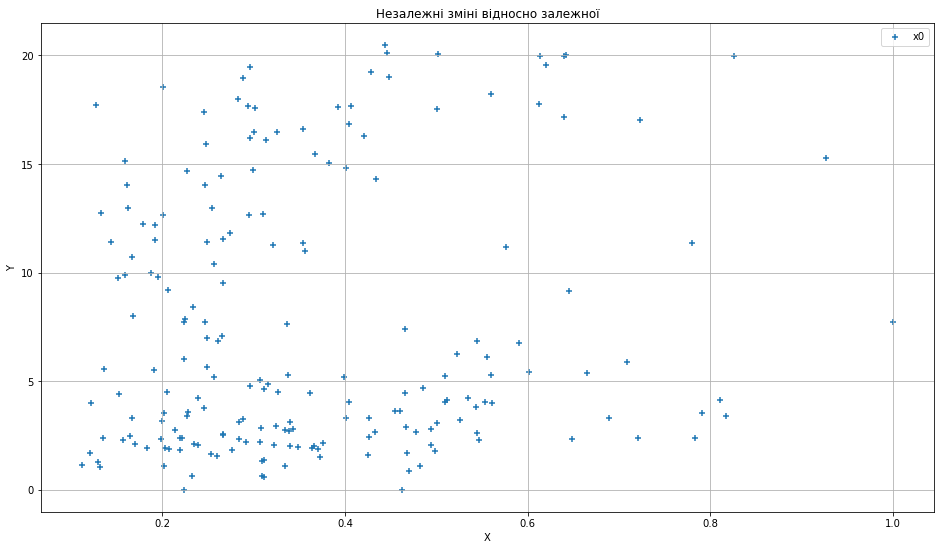

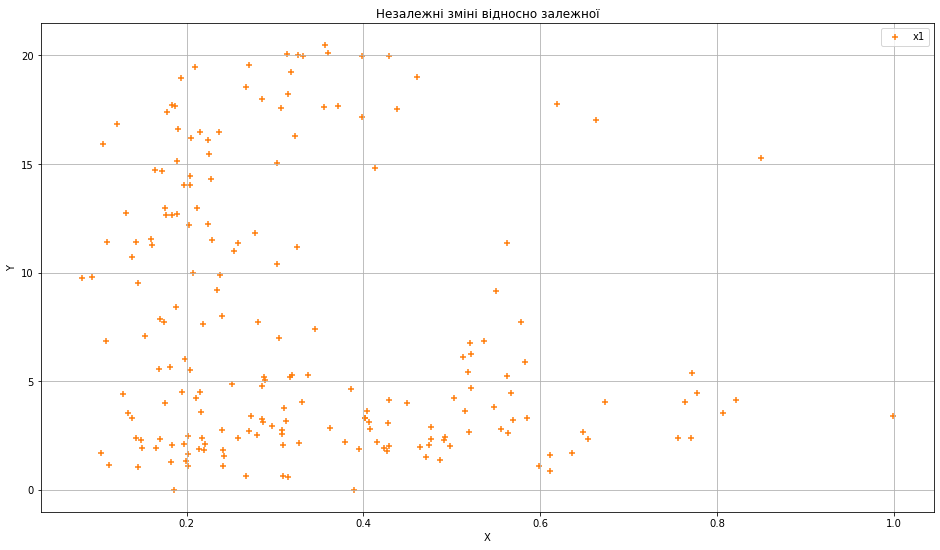

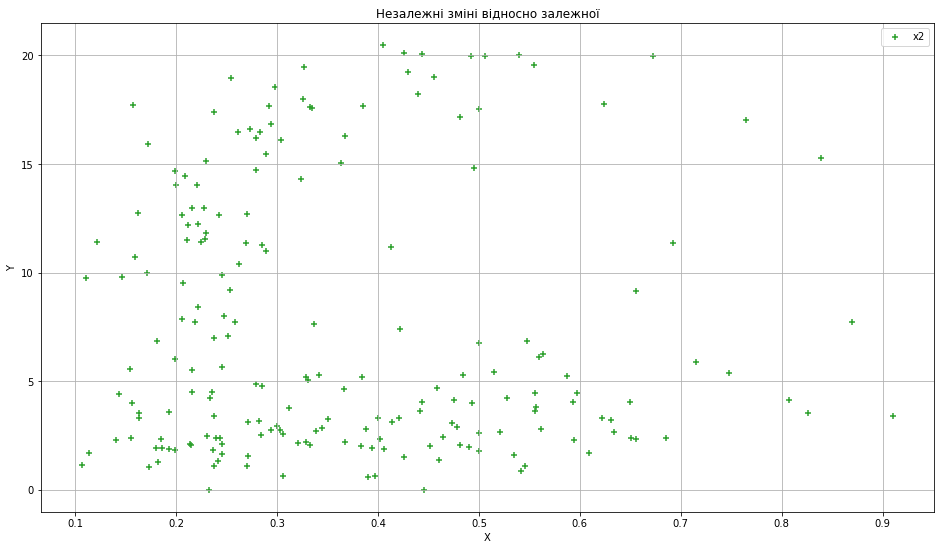

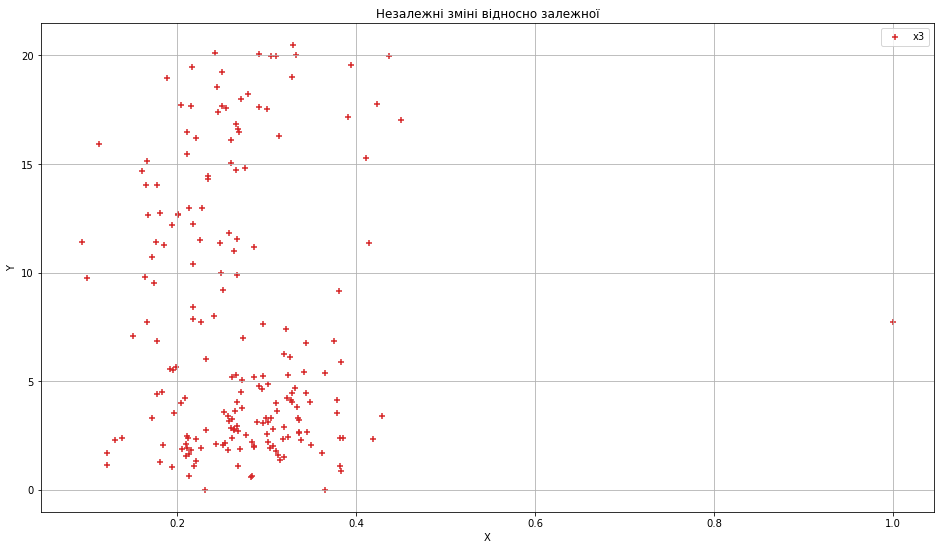

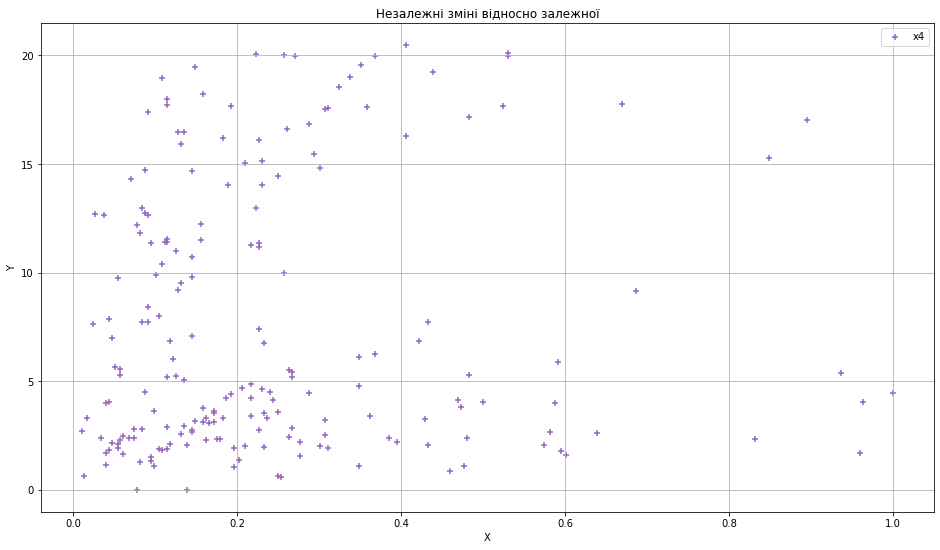

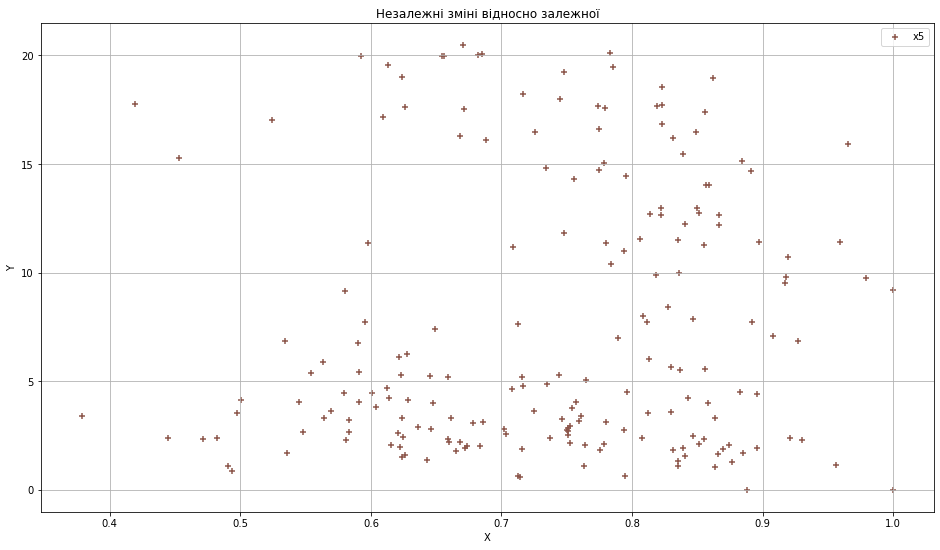

In [25]:
for i in train.columns[:-1]:
    plt.figure(figsize = (16,9))
    plt.grid()
    plt.title('Незалежні зміні відносно залежної')
    plt.scatter(train[i].values, train['y'].values, marker='+', color='C'+ i[-1], label=i)
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.legend(loc='best')
    plt.show()

In [19]:
df[df.columns[:-1]] = df[df.columns[:-1]]/df[df.columns[:-1]].max()
train = df.iloc[:200]
# визначення параметрів
system_len = len(train.columns)
alpha = 0.9

# знаходження коефіцієнтів
matrix_x = train[train.columns[:-1]].values
solve = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(matrix_x), matrix_x)), np.transpose(matrix_x)), train['y'].values)
b_0 = train[train.columns[-1]].mean() - (train[train.columns[:-1]].mean() * solve).sum()

# Оцінка статистичної значимості коефіцієнтів
# Відхилення
q_e = (train['y'] - (b_0 + train[train.columns[:-1]] * solve).sum(axis = 1))
# Оцінка дисперсії
s_2 = (q_e**2).sum()/(len(train) - system_len)
# Коефіцієнти зв'язку
K_coef = np.sqrt(np.diag(s_2 * np.linalg.inv(np.dot(np.transpose(matrix_x), matrix_x))))

t_student = round(sts.t.ppf((1 + alpha)/2, len(train) - system_len), 2)
t_calculated = (np.absolute(solve)/K_coef).round(2)
weight_coef = t_calculated > t_student

# Розрахунок коефіцієнта множинної детермінації
R = round(np.sqrt((np.dot(np.dot(np.transpose(solve), np.transpose(matrix_x)), train['y'].values) -
             len(train) * train['y'].mean())/\
    (np.dot(np.transpose(train['y'].values), train['y'].values) - len(train) * train['y'].mean())), 2)
print('Значення розподілу t = {} при параметрах alpha = {} & p = {} при'.format(t_student, alpha, len(train) - system_len))
print('b0 = {} значущий {}'.format(round(b_0, 2), False))
for i in range(len(solve)):
    print('b{} = {} значущий {} значення t роподілу = {} '
          .format(i+1, round(solve[i], 2), weight_coef[i], t_calculated[i]))
print('Коефіцієнт детермінації R = {}, R^2 = {},оцінка дисперції s^2 = {}'.format(R, round(R**2, 2), round(s_2, 2)))

Значення розподілу t = 1.65 при параметрах alpha = 0.9 & p = 193 при
b0 = 0.04 значущий False
b1 = 20.9 значущий True значення t роподілу = 3.19 
b2 = -38.32 значущий True значення t роподілу = 5.58 
b3 = 19.95 значущий True значення t роподілу = 1.73 
b4 = -12.49 значущий True значення t роподілу = 1.75 
b5 = 9.82 значущий True значення t роподілу = 3.87 
b6 = 8.9 значущий True значення t роподілу = 7.36 
Коефіцієнт детермінації R = 0.84 R^2 = 0.71 та оцінка дисперції s^2 = 26.46


In [20]:
def q_func(w0, wi):
    return ((1/len(matrix_x)) * ((w0 + train[train.columns[:-1]] * wi).sum(axis = 1) - train['y'])**2).mean()
# Градієнт функції
def gradient(w0, wi):
    w_0 = (2/len(matrix_x)) * ((w0 + train[train.columns[:-1]] * wi).sum(axis = 1) - train['y']).sum()
    w_i = list((2/len(matrix_x)) * \
    np.dot(np.transpose(matrix_x), ((w0 + train[train.columns[:-1]] * wi).sum(axis = 1) - train['y'])))
    w_i.append(w_0)
    return w_i

def answer(w_arg):
    lam = 1
    return w_arg - lam * np.array(gradient(w_arg[-1], w_arg[:-1])) / (w_arg**2).sum()

In [21]:
w = [np.random.uniform(0, 1, size=system_len)]
epsilon = 0.0001
error = []
k = [0]
while True:
    w.append(answer(w[-1]))
    error.append(np.absolute(q_func(w[-1][-1], w[-1][:-1]) - q_func(w[-2][-1], w[-2][:-1])))
    print('Ітерація № = {} Значення помилки = {} \n Значення аргументів {}'.format(k[-1], error[-1], w[-1]))
    if error[-1] < epsilon:
        break
    k.append(k[-1] + 1) 
coef_regretion = w[-1]
print('Ітерацій = {} Помилка = {} \n Вектор значень аргументів {}'.format(k[-1], error[-1], coef_regretion))

Ітерація № = 0 Значення помилки = 0.8413454882974276 
 Вектор значень аргументів [1.61838982 1.07544873 1.52764013 1.43798703 1.52236015 2.38937595
 2.83779303]
Ітерація № = 1 Значення помилки = 0.7539499343425984 
 Вектор значень аргументів [1.2135544  0.67342636 1.10849163 1.12928554 1.24985926 1.5810928
 1.72409893]
Ітерація № = 2 Значення помилки = 0.15150595861083085 
 Вектор значень аргументів [0.85916401 0.28873566 0.72624728 0.85034322 1.00911431 0.87922411
 0.73929257]
Ітерація № = 3 Значення помилки = 0.03220282018750867 
 Вектор значень аргументів [1.09358578 0.36109336 0.89390513 0.98626819 1.15626144 1.37363127
 1.33421771]
Ітерація № = 4 Значення помилки = 0.018814583990849704 
 Вектор значень аргументів [0.84514369 0.05197495 0.60745792 0.77962347 0.98523641 0.88357764
 0.62697932]
Ітерація № = 5 Значення помилки = 0.1393087363312203 
 Вектор значень аргументів [1.27577299 0.28588465 0.96260817 1.05482498 1.26316621 1.76370672
 1.73962505]
Ітерація № = 6 Значення помилки

In [22]:
# plt.figure(figsize = (16,9))
# plt.grid()
# plt.title('Значення функції помилки')
# plt.plot(k, error_func, color='r', label='error')
# plt.ylabel('value')
# plt.xlabel('iteration')
# plt.legend(loc='best')
# plt.show()

In [23]:
test = df.iloc[200:]
error_2_mnk = ((test['y'] - (b_0 + test[test.columns[:-1]] * solve).sum(axis = 1))**2).mean()
error_2_grad = ((test['y'] - (coef_regretion[-1] + test[test.columns[:-1]] * coef_regretion[:-1]).sum(axis = 1))**2).mean()
print('Похибка МНК = {} \nПохибка градієнта = {}'.format(error_2_mnk, error_2_grad))

Похибка МНК = 27.247791457115863 
Похибка градієнта = 38.37286035012089
